In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to include channel dimension (for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/Users/debrishidas/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8105 - loss: 0.6088 - val_accuracy: 0.9798 - val_loss: 0.0608
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9707 - loss: 0.0992 - val_accuracy: 0.9858 - val_loss: 0.0422
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9793 - loss: 0.0702 - val_accuracy: 0.9891 - val_loss: 0.0313
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9835 - loss: 0.0560 - val_accuracy: 0.9899 - val_loss: 0.0282
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9861 - loss: 0.0466 - val_accuracy: 0.9905 - val_loss: 0.0297
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9904 - val_loss: 0.0271
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9915 - val_loss: 0.0248
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9900 - loss: 0.0335 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0298
Test accuracy: 0.9919
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 7


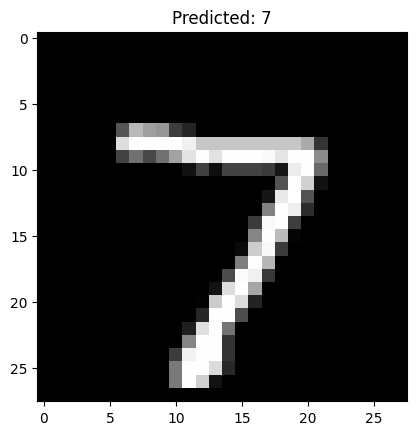

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Example: Predict on a single test image
import matplotlib.pyplot as plt

sample_image = x_test[0:1]
prediction = model.predict(sample_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.show()

In [8]:
import pickle

# Save model as a pickle file
with open('number_recognition_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [2]:
pip install tensorflow numpy matplotlib

     |████████████████████████████████| 252.5 MB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 667 kB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 2.1 MB/s  eta 0:00:01
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
     |████████████████████████████████| 329 kB 12.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/debrishidas/.pyenv/versions/3.9.7/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
